# * Titanic Project

# Problem Statement:

# The Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points, and whether or not they survived the disaster. Based on these features, you have to predict if an arbitrary passenger on Titanic would survive the sinking or not. 

# * always refer sklearn official doucmentation if you are not sure about syntax or parameters

# https://scikit-learn.org/stable/index.html¶

In [1]:
# let's start with importing necessary liabries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
data=pd.read_csv(r"D:\New folder\titanic_train.csv")

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.shape

(891, 12)

# understand data at high level .check the statistics of data set

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# It seems that are Age column in our data. are missing value let's fill the nan value

# Fill the Null values

In [7]:
data['Age']=data['Age'].fillna(data['Age'].mean())

In [8]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# the Null values are in Cabin and Embarked columns also

In [10]:
data['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [11]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

# Handling  the missing values

In [12]:
data=data.drop(columns=['Cabin'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


# Fill the Null value

In [13]:
data['Embarked']=data['Embarked'].fillna(data['Embarked'].mode()[0])

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
# the number of people are survived and not survived
data['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# o mean no survived 
# 1 mean survivded

# Data Visualization

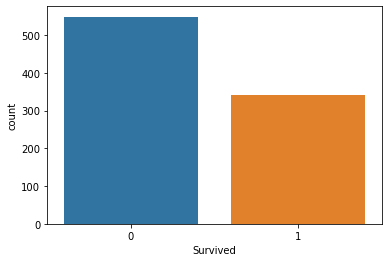

In [17]:
# making a count plot for survived column
sns.countplot('Survived',data=data)
plt.show()

In [18]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

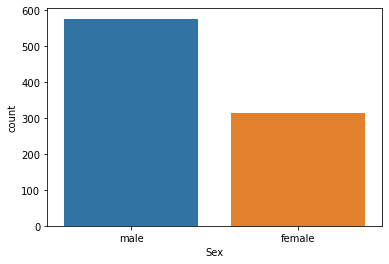

In [19]:
# making a count plot for sex column
sns.countplot('Sex',data=data)
plt.show()

In [23]:
# the number of people survived for gender

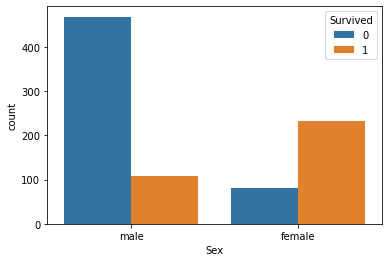

In [20]:
sns.countplot('Sex',hue='Survived',data=data)
plt.show()

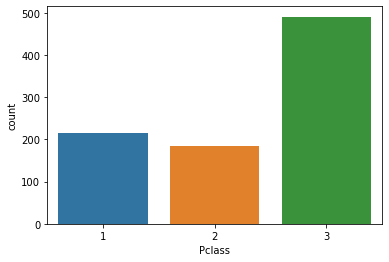

In [21]:
# making a count plot for Pclass column
sns.countplot('Pclass',data=data)
plt.show()

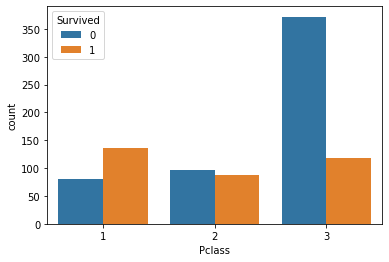

In [22]:
sns.countplot('Pclass',hue='Survived',data=data)
plt.show()

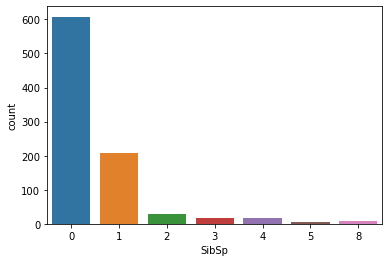

In [24]:
# making a count plot for SibSp column
sns.countplot('SibSp',data=data)
plt.show()

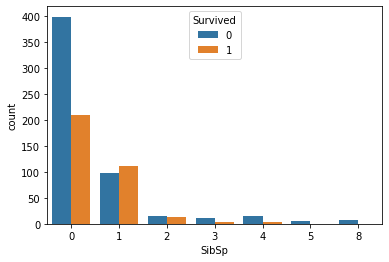

In [25]:
sns.countplot('SibSp',hue='Survived',data=data)
plt.show()

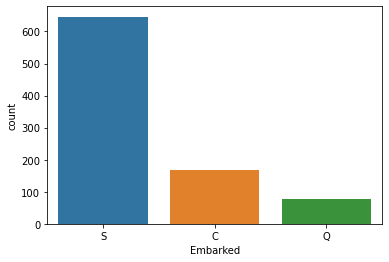

In [26]:
# making a count plot for Embarked column
sns.countplot('Embarked',data=data)
plt.show()

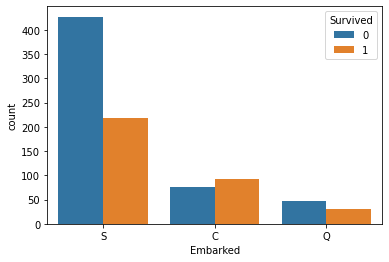

In [27]:
sns.countplot('Embarked',hue='Survived',data=data)
plt.show()

# Encoding the Categorical columns

In [28]:
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [29]:
data['Sex']=data['Sex'].replace({'male':0,'female':1})

In [30]:
data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [31]:
data['Embarked']=data['Embarked'].replace({'S':0,'C':1,'Q':2})

In [32]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


# dropping unwanted columns

In [34]:
data=data.drop(columns=['PassengerId','Name','Ticket'])
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [37]:
data.shape

(891, 8)

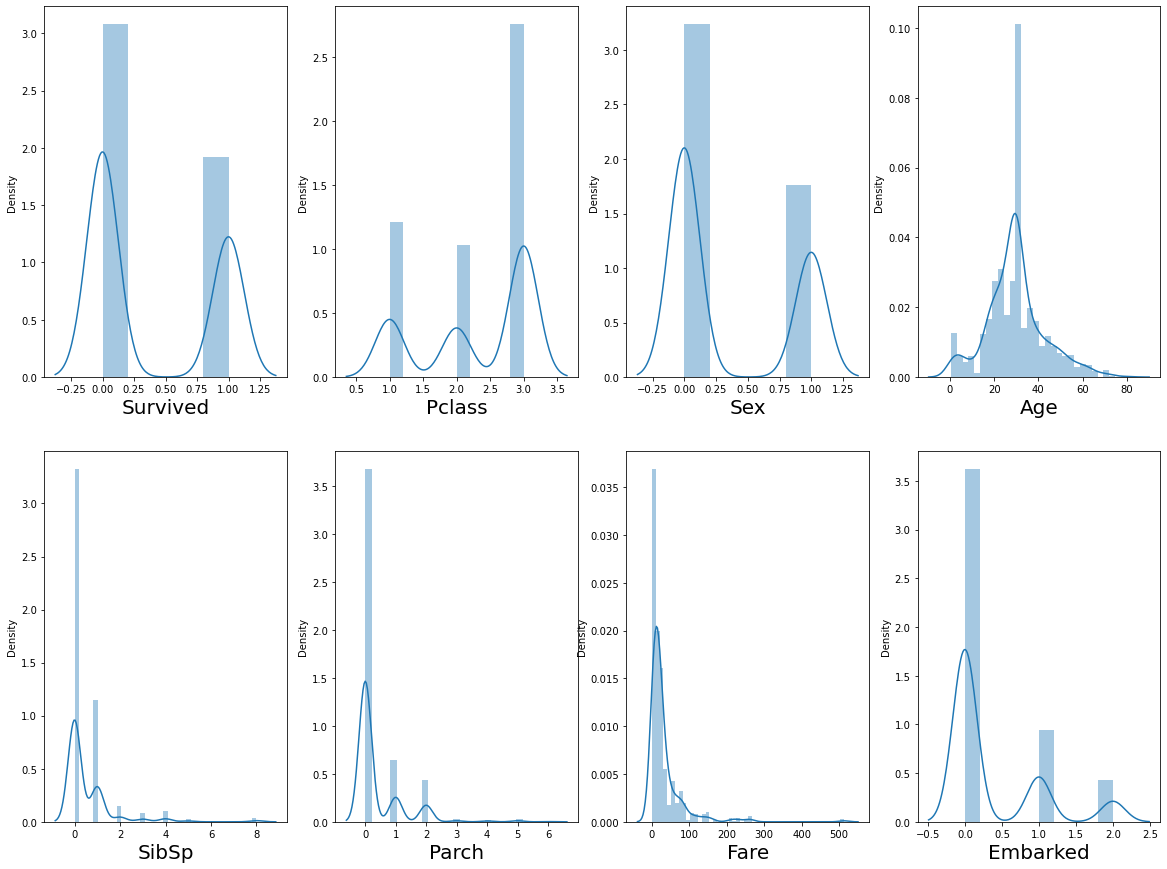

In [38]:
plt.figure(figsize=(20,15))
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Outliers checking

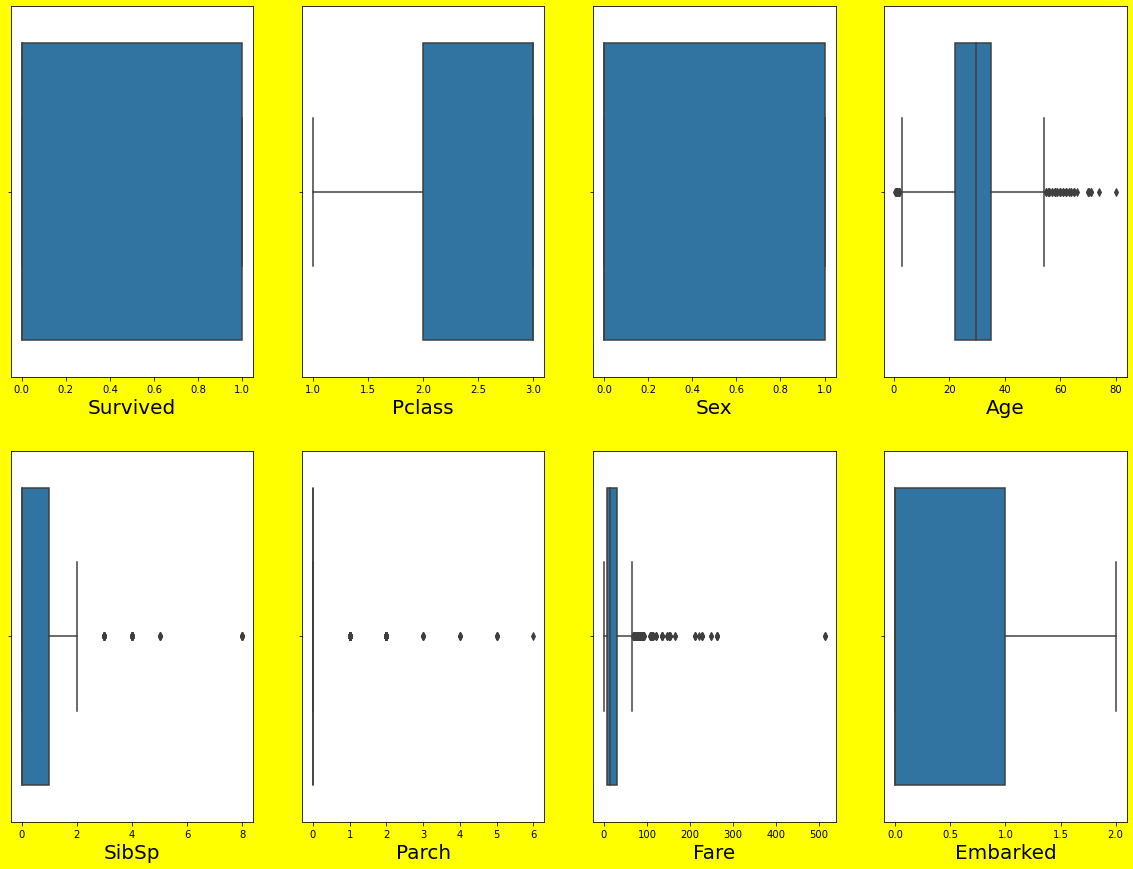

In [39]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# Skewness:

In [40]:
data.skew()

Survived    0.478523
Pclass     -0.630548
Sex         0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Embarked    1.543397
dtype: float64

# * Removing Outliers:

# z-score techinque:

In [41]:
from scipy.stats import zscore
import numpy as np
z_score = zscore(data[['Age','SibSp','Parch','Fare','Embarked']])
abs_z_score = np.abs(z_score)

In [42]:
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]
data.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000,820.000000
mean,0.390244,2.310976,0.342683,29.792831,0.348780,0.254878,25.836051,0.359756
std,0.488103,0.826678,0.474896,12.151418,0.619434,0.565308,29.817529,0.635606
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,23.000000,0.000000,0.000000,7.895800,0.000000
50%,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,13.000000,0.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,27.000000,1.000000
max,1.000000,3.000000,1.000000,66.000000,3.000000,2.000000,164.866700,2.000000


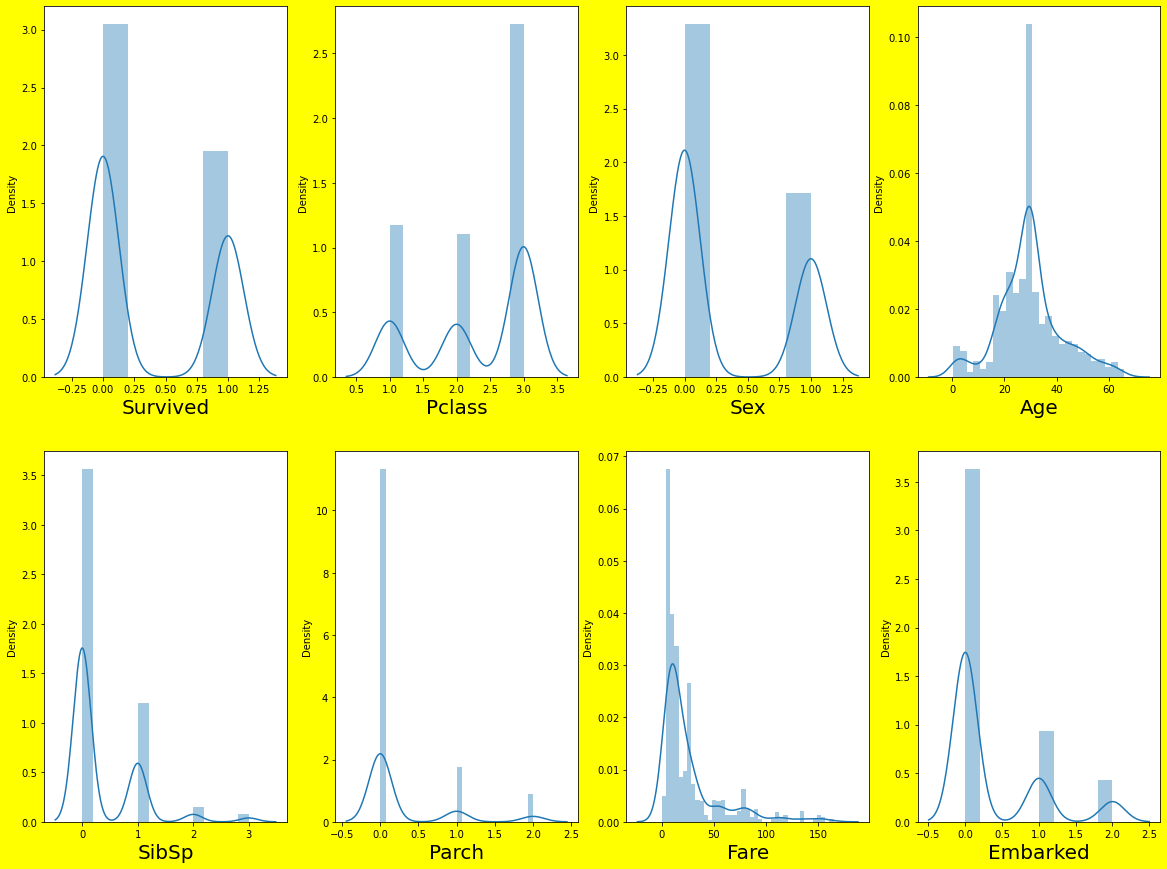

In [43]:
plt.figure(figsize=(20,15),facecolor='yellow')
plotnumber=1

for column in data:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

# * finding relationship we want to keep only those feature which have relationship with Label.

In [44]:
x = data.drop(columns=['Survived'])
y = data['Survived']

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scalar=StandardScaler()
scaled=scalar.fit_transform(x)

# * check Multicollinearty problem. find if one feature is dependent on another feature

# VIF (variance inflation factor)

In [48]:
scaled.shape

(820, 7)

In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(scaled,i)for i in range(scaled.shape[1])]

vif['feature']=x.columns

In [53]:
vif

,vif,feature
0,2.198836,Pclass
1,1.154244,Sex
2,1.250763,Age
3,1.186759,SibSp
4,1.286507,Parch
5,2.262308,Fare
6,1.052069,Embarked


# All the VIF values are less 5 and are very low that means no multicollinearity now we can go ahead with fitting our data to the model before that let's split in test and training set

# * Train Test Split

# split data into train and test modles will be bulit on training data and tested on test data

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(scaled,y,test_size=0.25,random_state=7999)

# write one function and call as many as time to check accuracy_score of differnt models

In [55]:
def metric_score(clf,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=clf.predict(x_train)
        
        print("\n===========train Result=============")
        print(f"accuracy score:{accuracy_score(y_train,y_pred)*100:.2f}%")
        
    elif train == False:
        pred=clf.predict(x_test)
        
        print("\n=============test Result=============")
        print(f"accuracy score:{accuracy_score(y_test,pred)*100:.2f}%")
        
        print("\n \n test classification report \n",classification_report(y_test,pred,digits=2))

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [57]:
from sklearn.metrics import classification_report

In [58]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

# call the function and pass dataset to check train and test score

In [60]:
metric_score(log_reg,x_train,x_test,y_train,y_test,train=True)
metric_score(log_reg,x_train,x_test,y_train,y_test,train=False)


===========train Result=============
accuracy score:79.67%

=============test Result=============
accuracy score:80.49%

 
 test classification report 
               precision    recall  f1-score   support

           0       0.83      0.87      0.84       126
           1       0.77      0.71      0.74        79

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.80       205



# Random Forest Classification

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
random_clf = RandomForestClassifier()
random_clf.fit(x_train,y_train)

RandomForestClassifier()

In [63]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


===========train Result=============
accuracy score:98.05%

=============test Result=============
accuracy score:81.95%

 
 test classification report 
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       126
           1       0.74      0.81      0.78        79

    accuracy                           0.82       205
   macro avg       0.81      0.82      0.81       205
weighted avg       0.82      0.82      0.82       205



# * Hyperparameters Tuning

In [64]:
params={'n_estimators':[13,15],
       'criterion':['entropy','gini'],
       'max_depth':[10,15],
       'min_samples_split':[10,11],
       'min_samples_leaf':[5,6],
       }

In [67]:
from sklearn.model_selection import GridSearchCV

In [70]:
grd=GridSearchCV(random_clf,param_grid=params)
grd.fit(x_train,y_train)

print('best_params =>',grd.best_params_)

best_params => {'criterion': 'gini', 'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 11, 'n_estimators': 15}


In [71]:
random_clf=grd.best_estimator_
random_clf.fit(x_train,y_train)

RandomForestClassifier(max_depth=15, min_samples_leaf=5, min_samples_split=11,
                       n_estimators=15)

In [72]:
metric_score(random_clf,x_train,x_test,y_train,y_test,train=True)
metric_score(random_clf,x_train,x_test,y_train,y_test,train=False)


===========train Result=============
accuracy score:87.15%

=============test Result=============
accuracy score:81.95%

 
 test classification report 
               precision    recall  f1-score   support

           0       0.85      0.86      0.85       126
           1       0.77      0.76      0.76        79

    accuracy                           0.82       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.82      0.82      0.82       205



# Lets Save Our Model

In [74]:
import pickle
filename='Titanic Project.'
pickle.dump(random_clf,open(filename,'wb'))

# Conclusion

In [75]:
loaded_model=pickle.load(open('Titanic Project','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

81.95121951219512


In [76]:
# batch  No - ds0522
# Data Trained